# introdction to scikit-learn(sklearn)
This notebook demonstrates some of the most useful functions of the beautiful  

In [1]:
# 1. Get data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("default")

In [3]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# creat x (features matrix)
x=heart_disease.drop("target",axis=1)

#creat y(label)
y= heart_disease["target"]

In [5]:
#2. choose thr right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

# we'll keep the defult hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. fit the model to training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [7]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1


In [9]:
# make a prediction 
#y_label= clf.predict(np.array([0,2,3,4]))
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [10]:
# 3. Evaluate the model on training and test data

clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        25
           1       0.79      0.86      0.83        36

    accuracy                           0.79        61
   macro avg       0.78      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[17,  8],
       [ 5, 31]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [15]:
#5. i mprrove a model
# try different amount of n-estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimator")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy one test set: {clf.score(x_test,y_test)*100:2f}%")
    print("")

Trying model with 10 estimator
Model accuracy one test set: 83.606557%

Trying model with 20 estimator
Model accuracy one test set: 81.967213%

Trying model with 30 estimator
Model accuracy one test set: 78.688525%

Trying model with 40 estimator
Model accuracy one test set: 83.606557%

Trying model with 50 estimator
Model accuracy one test set: 80.327869%

Trying model with 60 estimator
Model accuracy one test set: 78.688525%

Trying model with 70 estimator
Model accuracy one test set: 80.327869%

Trying model with 80 estimator
Model accuracy one test set: 81.967213%

Trying model with 90 estimator
Model accuracy one test set: 80.327869%



In [16]:
# 6. save a model and load it
#import pickle

#pickle.dump(clf,open("random_forst_model_1.pkl","wb"))

In [17]:
#loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
#loaded_model.score(x_test,y_test)

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels( usually x& y)
    2.filling (also called imputing ) or disregarding missing values
    3.Convwerting non-numerical values to numeric (also called feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# split the data into traivning and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y,
                                                   test_size=0.3)

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [23]:
x.shape

(303, 13)

In [24]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical

In [25]:
car_sales=pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [26]:
car_sales["Price"] = car_sales["Price"].replace("[$,]", "", regex=True).astype(str)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [27]:
car_sales["Price"] = car_sales["Price"].replace('[$,.]', '', regex=True).astype(int)

In [28]:
car_sales["Price"].dtype

dtype('int32')

In [29]:
car=pd.read_csv("car-sales-extended.csv")

In [30]:
len(car)

1000

In [31]:
car.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# split into x/y
x=car.drop("Price",axis=1)
y=car["Price"]

# split into training and test
x_test,x_test,y_test,y_test = train_test_split(x,
                                              y,
                                              test_size=0.2)

In [33]:
# Build maching learning model
# from sklearn.ensemble import RandomForestRegressor
# model= RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

In [34]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
# Turn the categories into number 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                              one_hot,
                              categorical_features)],
                           remainder ="passthrough")
transformed_x= transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [36]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [37]:
# Let's refit the model   # Error model not difiend
np.random.seed(42)
x_train, x_test, y_train, y_test= train_test_split(transformed_x, 
                                               y,
                                               test_size=0.2)
#model.fit(x_train,y_train)
# model.score(x_test,y_test)

#### what if there were missing values?
1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether


In [38]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
#CREAT X.Y
x1= car_sales_missing.drop("Price" ,axis=1)
y= car_sales_missing["Price"]

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                              one_hot,
                              categorical_features)],
                           remainder ="passthrough")
transformed_x= transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [42]:
# let's try convert our data to number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [43]:
#fill the "make" column
car_sales_missing["Make"].fillna("missimg", inplace= True)
# Fill the "COLOR" column
car_sales_missing["Colour"].fillna("missimg", inplace= True)
#fil the "Odometer (Km)" column
car_sales_missing["Odometer (KM)"].fillna("missimg", inplace= True) 
# Fill the "Doors" column 
car_sales_missing["Doors"].fillna(4, inplace= True)

In [44]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [45]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [46]:
x= car_sales_missing.drop("Price",axis=1)
y= car_sales_missing["Price"]

In [47]:
# let's try convert our data to number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_x= transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

In [48]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)     object
Doors            float64
Price            float64
dtype: object

##  Option 2 : fill missing value withe scikit learn

In [49]:
car_sales_missing =pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [50]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
#Drope the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
# Split into x&y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [53]:
# Fill missing withe scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical value with "missing" & numeric value  with mean 
cat_imputer = SimpleImputer(strategy="constant" , fill_value="missing")
door_imputer = SimpleImputer(strategy="constant" , fill_value=4)
num_imputer =  SimpleImputer(strategy="mean")

# Define columns

cat_features =["Make","Colour"]
door_feature=["Doors"]
num_features =["Odometer (KM)"]

# Create an imputer (somthing tat fills missing data )

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features )
])

# Transform the data
 
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [54]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make","Colour","Doors","Odometer"])
car_sales_filled

,Make,Colour,Doors,Odometer
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [55]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [56]:
#car_sales_filled.dtypes

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# Now we've got our data as number and filled (no missing values)
# Let's  fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(transformed_x,
                                                  y,
                                                  test_size=0.2)
model= RandomForestRegressor()
model.fit(x_train ,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [59]:
# check lengthe of transformed data (filled and one-hot encoded)
#vs.length of original data

len(car_sales_filled), len(car)

(950, 1000)

## 2. Chossing the right estimator/algorithm for your problem

some thing to note:
    * sklearn refers to maching learning models, algorithms as estimators.

### 2.1 picking a machine learning model for a regression problem



In [60]:
# Get california housing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
housing_df=pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [62]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
#housing_df.drop("MedHouseVal",axis=1)


In [64]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [65]:
# Import algorithm 
from sklearn.linear_model import Ridge
# setip random seed
np.random.seed(42)

# Creat the data
x= housing_df.drop("target", axis=1)
y=housing_df["target"] # median house price in $ 100,000s

#split into tran and test set
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

# instantiate and fit model (on the training setabs)
model =Ridge()
model.fit(x_train,y_train)

# Check the score of model (on thr test set)
model.score(x_test,y_test)

0.5758549611440126

In [66]:
# Import algorithm 
from sklearn import svm
# setip random seed
np.random.seed(42)

# Creat the data
x= housing_df.drop("target", axis=1)
y=housing_df["target"] # median house price in $ 100,000s

#split into tran and test set
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

# instantiate and fit model (on the training setabs)
model =Ridge()
model.fit(x_train,y_train)

# Check the score of model (on thr test set)
model.score(x_test,y_test)

0.5758549611440126

what if Ridge didn't work or the score didn't fit our need?
Well, we could always try different model

In [67]:
# Import the RandomForestRegressor model class from thr=er ensemble module 
from sklearn.ensemble import RandomForestRegressor
# setip random seed
np.random.seed(42)

# Creat the data
x= housing_df.drop("target", axis=1)
y=housing_df["target"] # median house price in $ 100,000s

#split into tran and test set
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

# instantiate and fit model (on the training setabs)
model =RandomForestRegressor()
model.fit(x_train,y_train)

# Check the score of model (on thr test set)
model.score(x_test,y_test)

0.8057655811971304

## 2.2 Picking a machine learing model for a classification

In [68]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
len(heart_disease)

303

In [70]:
# import the linearSVC estimatot class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
clf= LinearSVC()
clf.fit(x_train,y_train)
# Check score
clf.score(x_test,y_test)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [71]:
# import the RandomForestClassifier estimatot class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
clf= RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
# Check score
clf.score(x_test,y_test)


0.8524590163934426

Tidbit:
    1. if you have structured data, used ensemble method 
    2.if you have unstructured, ues deep learning or transfer learninm

 ## 3. Fit the model algorithm on our data and use it to make predictioins
### 3.1 Fitting the model to the data

Different name for:
* `x`= feature ,features variables, data
* `y`= labels,targets, target varibles

In [72]:
# import the RandomForestClassifier estimatot class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data 
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split the data
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2)

#Instantiate LinearSVC
clf= RandomForestClassifier(n_estimators=100)

#Fit the model to the data
clf.fit(x_train,y_train)

# Check score
clf.score(x_test,y_test)


0.8524590163934426

In [73]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [74]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make prediction using a machine learning model

2 ways to make prediction :


1. `predict()` 

2. `predict_proba()`

In [75]:
# Use a trained model to make prediction 
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [77]:
# Compar prediction to truth labels evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [78]:
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`


In [80]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [81]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [82]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()`can also be used for regression model

In [83]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [84]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the  data
x= housing_df.drop("target", axis=1)
y= housing_df["target"]

# Split data

x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(x_train,y_train)

#Make predictions
y_preds =model.predict(x_test)

In [85]:
y_preds[:10]

array([0.4943   , 0.7642   , 4.9346864, 2.56113  , 2.29764  , 1.6625701,
       2.34127  , 1.66352  , 2.48233  , 4.843458 ])

In [86]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [87]:
len(y_test)

4128

In [88]:
len(y_preds)

4128

In [89]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3267155795542638

## 4. Evaluating a machine learning method


Three ways to evaluate Scikit-Learn models/ estimators
   1. Estimator's built-in `score()` method
   2. The `scoring` parameter
   3. problem-specific metric functions 

### 4.1 Evaluting a model with the `score` method 

In [90]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create tarin / test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model 
model= RandomForestClassifier()

# fit the into model 
model.fit(x_train,y_train)


RandomForestClassifier()

In [91]:
model.score(x_train,y_train)

1.0

In [92]:
model.score(x_test,y_test)

0.8524590163934426

Let's use the `score()` on our regression problem

In [93]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#Create the data
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create tarin / test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model 
model= RandomForestRegressor(n_estimators=1000
                            )

# fit the into model 
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000)

In [94]:
model.score(x_test,y_test)

0.5314492715517243

### 4.2 Evaluating a model using the `scoring` parameter 

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create tarin / test 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model 
model= RandomForestClassifier()

# fit the into model 
model.fit(x_train,y_train)


RandomForestClassifier()

In [96]:
model.score(x_test,y_test)

0.8524590163934426

In [97]:
cross_val_score(model, x, y ,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [98]:
np.random.seed(42)

#single training and test split score
model_single_score = model.score(x_test,y_test)

#Take the mean of 5-fold cross-validatin score
model_cross_val_score = np.mean(cross_val_score(model, x, y ,cv=5))

# Compare the tow
model_cross_val_score ,model_single_score # even its lower we prever cross vildation

(0.8248087431693989, 0.8524590163934426)

## 4.2.1  Classification model evalution metrics

1. Accuracy 
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### ACCURACY

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier()
cross_val_score= cross_val_score(clf, x, y, cv=5)



In [100]:
np.mean(cross_val_score)

0.8248087431693989

In [101]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score) *100:2f}%")

Heart Disease Classifier Cross-validated Accuracy: 82.480874%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

In [102]:
# Creat x_test.....etc

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [103]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train,y_train)


# make prediction with probabilities

y_prob= clf.predict_proba(x_test)

y_prob[:10], len(y_prob)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [104]:
y_prob_pos = y_prob[:, 1]
y_prob_pos[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [105]:
# Calculate fpr, erp and threshold

fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos)
fpr, tpr, thresholds

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
        0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
        0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
        1.        ]),
 array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
        0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
        0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
        0.9375 , 0.96875, 0.96875, 1.     , 1.     ]),
 array([2.  , 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
        0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
        0.28, 0.23, 0.2 , 0.  ]))

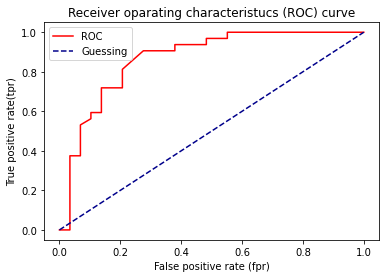

In [106]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr,tpr):
    """
    plots as ROC curve given the fals positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color="red", label= "ROC")
    
    # Plot linr with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label= "Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver oparating characteristucs (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_pos)

0.8669181034482759

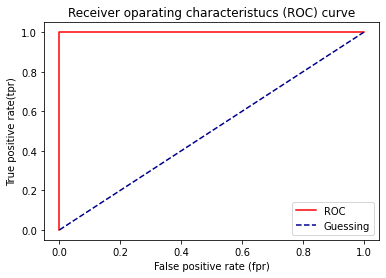

In [108]:
#plot pervect Roc curve AUC score
fpr, tpr, thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr, tpr)

In [109]:
# perfect AUC score 
roc_auc_score(y_test,y_test)

1.0

**Confusion Matrix**

In [110]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test , y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [111]:
y_test

110    1
40     1
31     1
101    1
86     1
      ..
37     1
300    0
162    1
284    0
166    0
Name: target, Length: 61, dtype: int64

In [112]:
# Visualizer confusion  matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"]
           )

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [113]:
23+6+6+26

61

In [114]:
len(x_test)

61

In [115]:
import sklearn
sklearn. __version__ 

'0.24.2'

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, x=x, y=y)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

<AxesSubplot:>

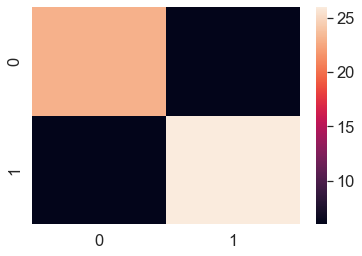

In [118]:
# Make our matrix morew visule withe seaborn heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Creat a confusion matrix

conf_mat = confusion_matrix(y_test ,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)